## Hoja de trabajo 7.1 SVM ##
**José Hurtarte 19707**  
**Andrei Portales 19825**  
**Christian Pérez 19710**  

In [113]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score,classification_report
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

#import graphviz
#from sklearn.tree import convert_to_graphviz


%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

In [63]:
data = pd.read_csv('data/train.csv').drop(['Id'], axis = 1)
# test = pd.read_csv('data/test.csv')

In [64]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [65]:
# train columns
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### Filtrado de variables cara, mediana y económica

In [66]:
low_price_limit = data.SalePrice.quantile(0.33)
mid_price_limit = data.SalePrice.quantile(0.67)

(low_price_limit, mid_price_limit)

(139000.0, 191000.0)

In [67]:
data['PriceRangeInt'] = 1
data['PriceRangeInt'][data['SalePrice'] < low_price_limit] = 0
data['PriceRangeInt'][data['SalePrice'] > mid_price_limit] = 2
data['PriceRangeInt']

C:\Users\josej\AppData\Local\Temp\ipykernel_20648\716762574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PriceRangeInt'][data['SalePrice'] < low_price_limit] = 0
C:\Users\josej\AppData\Local\Temp\ipykernel_20648\716762574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PriceRangeInt'][data['SalePrice'] > mid_price_limit] = 2


0       2
1       1
2       2
3       1
4       2
       ..
1455    1
1456    2
1457    2
1458    1
1459    1
Name: PriceRangeInt, Length: 1460, dtype: int64

In [68]:
predictors_1 =['GrLivArea', 'GarageCars', 'TotalBsmtSF', 'OverallQual']
data[predictors_1]

,GrLivArea,GarageCars,TotalBsmtSF,OverallQual
0,1710,2,856,7
1,1262,2,1262,6
2,1786,2,920,7
3,1717,3,756,7
4,2198,3,1145,8
...,...,...,...,...
1455,1647,2,953,6
1456,2073,2,1542,6
1457,2340,1,1152,7
1458,1078,1,1078,5


<AxesSubplot:>

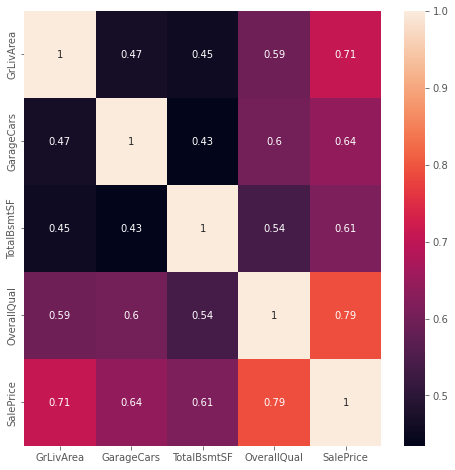

In [69]:
plt.subplots(figsize = (8,8))
sns.heatmap(data[predictors_1 + ['SalePrice']].corr(), xticklabels=data[predictors_1 + ['SalePrice']].corr().columns, yticklabels=data[predictors_1 + ['SalePrice']].corr().columns, annot=True)


Para las variables a incluír en esta hoja de trabajo se escogieron todas aquellas que tuviesen una correlación con coeficiente de Pearson alta y que tuviesen una correlación no fuerte entre ellas para evitar el overfit. Además para que fuesen aptas para una máquina de soporte es necesario que todas sean variables númericas y ya que no se cuenta con una escala congruente una normalización arrojaría exactamente los mismos resultados que los datos no normalizados, con esto en base la única transformación en el dataset fue la variable respuesta basada en percentiles además del filtrado para variables no existentes para evitar fallos en los modelos de predicción.

## Modelo Kernel Lineal

#### Dataset de entrenamiento y prueba

In [70]:
# Data con variables para no modificar dataset original
data_vars = data[predictors_1  + ['PriceRangeInt']]
data_vars = data_vars.dropna()

y = data_vars['PriceRangeInt']  #La variable respuesta
X = data_vars[predictors_1] #El resto de los datos

In [71]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7, random_state=123)

#### Tuning con parametro C

In [72]:
modelo_svm = SVC(kernel='linear', max_iter=1000000, random_state=123)
modelo_svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': 1000000,
 'probability': False,
 'random_state': 123,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [73]:
# #param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
param_grid = {'C': [0.1, 1, 10, 100, 1000]}
model_grid_search = GridSearchCV(modelo_svm, param_grid, cv=2,n_jobs=-1)
model_grid_search.fit(X_train, y_train)




C:\Users\josej\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(cv=2,
             estimator=SVC(kernel='linear', max_iter=1000000, random_state=123),
             n_jobs=-1, param_grid={'C': [0.1, 1, 10, 100, 1000]})

#### Para este modelo de kernel se utilizó únicamente un tuning con el parametro C debido a que es el único adaptable para un kernel lineal, el cual nos dice el margen al rededor del modelo. Mientras más grande sea C se reduce más el margen.  

In [74]:
cv_results = pd.DataFrame(model_grid_search.cv_results_).sort_values(by='mean_test_score', ascending=False)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,2.470893,0.333608,0.008478,4.984140e-04,0.1,{'C': 0.1},0.771037,0.772549,0.771793,0.000756,1
1,7.666005,0.352557,0.005984,3.576279e-07,1,{'C': 1},0.583170,0.643137,0.613154,0.029984,2
2,8.518225,0.252326,0.002992,5.960464e-07,10,{'C': 10},0.645793,0.421569,0.533681,0.112112,3
3,9.003430,0.354551,0.003491,4.993677e-04,100,{'C': 100},0.418787,0.388235,0.403511,0.015276,4
4,7.906538,0.443339,0.002494,4.982948e-04,1000,{'C': 1000},0.322896,0.472549,0.397723,0.074826,5


#### Para un máximo de 1 millón de itereaciones se encontró que el mejor valor de C con 2 cross validations es de 0.1, teniendo un puntaje medio de medio del 0.77 lo cual es un puntaje bastante bueno que nos indica una buena tendendia a predecir datos correctamente

In [75]:
y_pred = model_grid_search.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

In [76]:
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión para detectar casas con kernel lineal\n',cm)
print('Accuracy: ',accuracy)

Matriz de confusión para detectar casas con kernel lineal
 [[111  18   4]
 [ 46  94  13]
 [  1  28 123]]
Accuracy:  0.7488584474885844


In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76       133
           1       0.67      0.61      0.64       153
           2       0.88      0.81      0.84       152

    accuracy                           0.75       438
   macro avg       0.75      0.75      0.75       438
weighted avg       0.75      0.75      0.75       438



#### Mediante la matriz de confusión se observa que tiene una exactitud del 0.748, diciendonos que predice en el modelo 74.8% de los datos correctamente.  
#### podemos ver también en el informe de predicción individual hecha a cada una de las categorías que es bastante bueno prediciendo correctamente casas de costo barato y casas de costo alto. Sin embargo, al observar las predicciones de las casas de costo mediano podemos observar que tiende a tener menor presición que el resto y un menor recall, indicandonos que predice erroneamente casas de otras categorías como casas de precio medio.

## Modelo Kernel Radial

#### Tuning con parametro C y Gamma

In [85]:
modelo_svm = SVC(kernel='rbf', max_iter=1000000, random_state=123)
modelo_svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': 1000000,
 'probability': False,
 'random_state': 123,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [86]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
model_grid_search = GridSearchCV(modelo_svm, param_grid, cv=2,n_jobs=-1)
model_grid_search.fit(X_train, y_train)




GridSearchCV(cv=2, estimator=SVC(max_iter=1000000, random_state=123), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

#### El modelo radial acepta parametros de C y Gamma. Gamma nos dicta hasta donde influencia una ocurrencia, siendo un valor más alto de gamma un indicador de que el modelo se estará adaptando de manera muy cercana a cada uno de los datos.

In [87]:
cv_results = pd.DataFrame(model_grid_search.cv_results_).sort_values(by='mean_test_score', ascending=False)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
9,0.023935,0.001995,0.048372,6.482720e-03,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.694716,0.694118,0.694417,0.000299,1
14,0.027426,0.004488,0.040892,1.311302e-06,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.659491,0.664706,0.662099,0.002607,2
24,0.072815,0.004488,0.019484,4.622936e-04,1000,0.0001,"{'C': 1000, 'gamma': 0.0001}",0.651663,0.649020,0.650342,0.001322,3
19,0.034408,0.003491,0.038896,1.192093e-07,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.637965,0.641176,0.639571,0.001606,4
8,0.043882,0.007979,0.062832,8.975625e-03,1,0.001,"{'C': 1, 'gamma': 0.001}",0.634051,0.627451,0.630751,0.003300,5


#### Este modelo convergió antes del millón de iteraciones de límite establecidas en todos los casos, teniendo un tiempo de ejecución menor. Además se escogio la combinación de un valor C = 1 y gamma = 0.0001, teniendo un score medio entre 2 cross validations de 0.694. Algo interesante a mencionar es que en los 4 modelos el valor de gamma es el mismo, por lo que se puede decir que desde esta perspectiva cada punto fue tomado con una alta influencia sobre el modelo de predicción.

In [88]:
y_pred = model_grid_search.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

In [89]:
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión para detectar casas con kernel lineal\n',cm)
print('Accuracy: ',accuracy)

Matriz de confusión para detectar casas con kernel lineal
 [[103  20  10]
 [ 28 110  15]
 [  2  28 122]]
Accuracy:  0.7648401826484018


In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       133
           1       0.70      0.72      0.71       153
           2       0.83      0.80      0.82       152

    accuracy                           0.76       438
   macro avg       0.77      0.77      0.77       438
weighted avg       0.77      0.76      0.77       438



#### A pesar de tener un score medio 0.694, la exactitud del modelo fue del 76% lo cual es levemente superior al modelo con kernel lineal. Además podemos observar en el reporte individual que tiene una muy buena presición del 83% para la categoría de casas caras.  
#### También se observa que el valor mínimo de recall es del 0.72 y de presición del 0.70, ambas en la clasificación de casas medianas, a pesar de ser numeros bastantes aceptables se puede decir que esta categoría fue la que más problemas tuvo al clasificar.

## Modelo Kernel polinomico

#### Tuning con parametro C, gamma y degree (grados de libertad)

In [91]:
modelo_svm = SVC(kernel='poly', max_iter=1000000, random_state=123)
modelo_svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': 1000000,
 'probability': False,
 'random_state': 123,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [92]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'degree': [2, 3, 4, 5, 6]}
model_grid_search = GridSearchCV(modelo_svm, param_grid, cv=2,n_jobs=-1)
model_grid_search.fit(X_train, y_train)




C:\Users\josej\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(cv=2,
             estimator=SVC(kernel='poly', max_iter=1000000, random_state=123),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'degree': [2, 3, 4, 5, 6],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

#### Para este modelo con un máximo de 1 millón de iteraciones se modificaron gamma, C y los grados de libertad del modelo polinomial.

In [93]:
cv_results = pd.DataFrame(model_grid_search.cv_results_).sort_values(by='mean_test_score', ascending=False)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
4,0.846237,0.111203,0.010971,0.000998,0.1,2,0.0001,"{'C': 0.1, 'degree': 2, 'gamma': 0.0001}",0.782779,0.754902,0.768840,0.013938,1
29,2.809989,0.502159,0.009474,0.000498,1,2,0.0001,"{'C': 1, 'degree': 2, 'gamma': 0.0001}",0.778865,0.711765,0.745315,0.033550,2
75,8.451443,0.313163,0.004987,0.000998,100,2,1,"{'C': 100, 'degree': 2, 'gamma': 1}",0.610568,0.660784,0.635676,0.025108,3
3,7.061622,0.132146,0.008976,0.000998,0.1,2,0.001,"{'C': 0.1, 'degree': 2, 'gamma': 0.001}",0.708415,0.525490,0.616953,0.091462,4
19,9.921514,0.040891,0.008977,0.000998,0.1,5,0.0001,"{'C': 0.1, 'degree': 5, 'gamma': 0.0001}",0.649706,0.539216,0.594461,0.055245,5


#### El mejor modelo basado en el score medio de las 2 cross validations son los que poseen los siguientes valores de parametros: 	{'C': 0.1, 'degree': 2, 'gamma': 0.0001}.  
#### Además en el top 4 de mejores modelos se observa que el valor que no cambia son los grados de libertad, lo cual nos indica que con una potencia de 2 suele hacer mejores predicciones con kernel polinomial.

In [94]:
y_pred = model_grid_search.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

In [95]:
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión para detectar casas con kernel lineal\n',cm)
print('Accuracy: ',accuracy)

Matriz de confusión para detectar casas con kernel lineal
 [[107  23   3]
 [ 41 104   8]
 [  0  36 116]]
Accuracy:  0.7465753424657534


In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76       133
           1       0.64      0.68      0.66       153
           2       0.91      0.76      0.83       152

    accuracy                           0.75       438
   macro avg       0.76      0.75      0.75       438
weighted avg       0.76      0.75      0.75       438



#### Este modelo posee una exactitud del 74.6% siendo levemente mayor a la del modelo con kernel lineal.   
#### A pesar de que este tuviese un score superior (0.768) al del kernel radial, podemos observar que la exactitud es menor, esto se puede deber a que este modelo sea bastante bueno prediciendo casas caras basados en la presición y el recall, pero tiene problemas al predecir las casas de mediano precio, ya que ambos puntajes de recall y presición para casas de mediano precio son inferiores al 0.7.  
#### Por lo que podemos decir que el modelo radial es el mejor no solo en presición si no en tener el menor número falsos positivos en todas las predicciones de las categorías en comparacion a los modelos lineal y polinómico.

## Comparación con modelos anteriores

### Arbol de desición

[Text(0.6240137685643564, 0.9705882352941176, 'OverallQual <= 6.5\ngini = 0.666\nsamples = 1021\nvalue = [338, 356, 327]\nclass = Bajo'),
 Text(0.40164758663366334, 0.9117647058823529, 'OverallQual <= 5.5\ngini = 0.559\nsamples = 637\nvalue = [330, 261, 46]\nclass = Alto'),
 Text(0.25642017326732675, 0.8529411764705882, 'TotalBsmtSF <= 1050.5\ngini = 0.429\nsamples = 384\nvalue = [270, 106, 8]\nclass = Alto'),
 Text(0.1625928217821782, 0.7941176470588235, 'GrLivArea <= 1383.5\ngini = 0.295\nsamples = 287\nvalue = [236, 49, 2]\nclass = Alto'),
 Text(0.0708539603960396, 0.7352941176470589, 'GarageCars <= 1.5\ngini = 0.175\nsamples = 227\nvalue = [205, 22, 0]\nclass = Alto'),
 Text(0.04207920792079208, 0.6764705882352942, 'GrLivArea <= 1341.5\ngini = 0.086\nsamples = 156\nvalue = [149, 7, 0]\nclass = Alto'),
 Text(0.024752475247524754, 0.6176470588235294, 'TotalBsmtSF <= 982.5\ngini = 0.041\nsamples = 144\nvalue = [141, 3, 0]\nclass = Alto'),
 Text(0.01485148514851485, 0.5588235294117647,

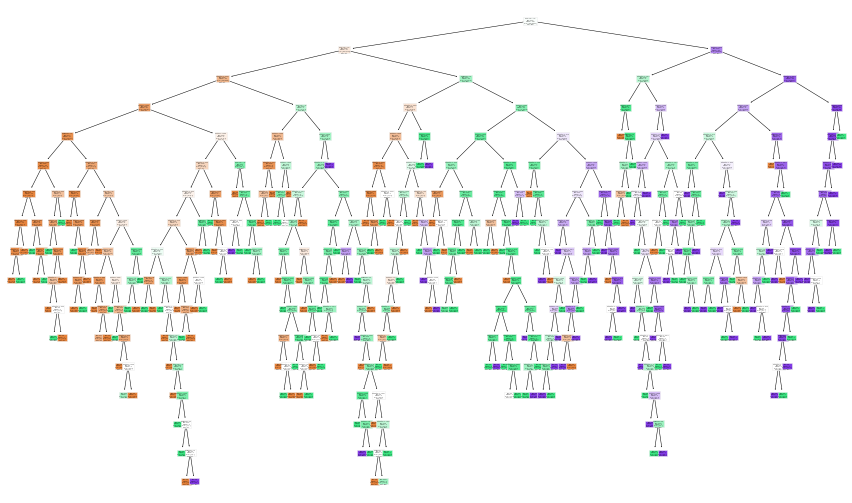

In [98]:
arbol = DecisionTreeClassifier(random_state=123) 
arbol = arbol.fit(X_train, y_train) 
tree.plot_tree(arbol,feature_names=data[predictors_1].columns,
               class_names=['Alto','Bajo','Medio'],filled=True )

In [100]:
y_pred = arbol.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

In [101]:
accuracy=accuracy_score(y_test,y_pred)
print('Matriz de confusión para detectar precios de casas con Classification Tree\n',cm)
print('Accuracy: ',accuracy)

Matriz de confusión para detectar precios de casas con Classification Tree
 [[102  28   3]
 [ 35  95  23]
 [  1  29 122]]
Accuracy:  0.728310502283105


In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       133
           1       0.62      0.62      0.62       153
           2       0.82      0.80      0.81       152

    accuracy                           0.73       438
   macro avg       0.73      0.73      0.73       438
weighted avg       0.73      0.73      0.73       438



### Random Forest

In [109]:
arbol = RandomForestClassifier(random_state=123)
arbol = arbol.fit(X_train, y_train) 

In [110]:
y_pred = arbol.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

In [111]:
accuracy=accuracy_score(y_test,y_pred)
print('Matriz de confusión para detectar precios de casas con Random Forest\n',cm)
print('Accuracy: ',accuracy)

Matriz de confusión para detectar precios de casas con Random Forest
 [[105  27   1]
 [ 34  98  21]
 [  1  24 127]]
Accuracy:  0.7534246575342466


In [112]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       133
           1       0.66      0.64      0.65       153
           2       0.85      0.84      0.84       152

    accuracy                           0.75       438
   macro avg       0.75      0.76      0.75       438
weighted avg       0.75      0.75      0.75       438



### Naive Bayes

In [116]:
gaussian = GaussianNB() 
gaussian.fit(X_train,y_train)

GaussianNB()

In [117]:
y_pred = gaussian.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

In [118]:
accuracy=accuracy_score(y_test,y_pred)
print('Matriz de confusión para detectar precios de casas con Classification Tree\n',cm)
print('Accuracy: ',accuracy)

Matriz de confusión para detectar precios de casas con Classification Tree
 [[110  21   2]
 [ 40 106   7]
 [  0  44 108]]
Accuracy:  0.7397260273972602


In [119]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78       133
           1       0.62      0.69      0.65       153
           2       0.92      0.71      0.80       152

    accuracy                           0.74       438
   macro avg       0.76      0.74      0.74       438
weighted avg       0.76      0.74      0.74       438



### Conclusión comparación a modelos anteriores

#### Basado en los modelos anteriores podemos observar que el que el Classification tree tiene una exactitud del 72.8%, el Random Forest del 75.3%  y el Naive Bayes del 73.9%. Debido a esto todos estos modelos anteriores tienen menor exactitud que el mejor modelo de SVM para nuestro dataset (Kernell radial con C=1 y Gamma = 0.0001), teniendo este una exactitud del 76.4%, puede que sea una diferencia leve, pero basados en las cantidades de falsos positivos (0.66 de precisión y 0.64 de recall en el mejor caso de los modelos anteriores) y en exactitud(75.3% en el random forest) podemos asegurar que el modelo de SVM con kernel radial superior a los modelos anteriores anteriores.   
#### Algo que podemos mencionar es que el modelo de Naive Bayes tiene problemas al clasificar casas con precio mediano, teniendo una precisión del 62%, teniendo incluso menos precisión que los modelos con kernel lineal y polinómico de SVM. Algo interesante a mencionar es que el modelo SVM con Kernel lineal toma poco tiempo a comparación de los kernel lineal y polinómico, debido a que este si converge en iteraciones. Además de los modelos anteriores el classification tree fue el que más tiempo tardó, teniendo una media de 30s, esto debido a que no había un limite en la profundidad del árbol, lo cual extendió el tiempo de ejecución y a pesar de esto no logró superar la exactitud de los modelos de SVM.